In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest

In [301]:
#upload output file of 'Generate_csv.ipynb' notebook, contains a merged table of certain PolarityJaM features (subset of 'merged properties' output file).
#each row represents output of a single cell.

file_name_properties = "T:/Olya/THESIS/Figures/Data analysis/cell shape KLF4/summary_table_cell_area_elongation_EGM2_21_22.csv"
output_folder = "T:/Olya/THESIS/Figures/Data analysis/cell shape KLF4/"
properties_df = pd.read_csv(file_name_properties)#, sep=";")
properties_df

,Unnamed: 0,short_name,filename,cell_major_to_minor_ratio,cell_area,cell_area_um^2,new_name,condition
0,11288.0,18dyn_16h_siAlk1,080122 Alk1 18dyn 16h #01,1.234228,11434,1970.428337,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,EGM2_2022
1,11289.0,18dyn_16h_siAlk1,080122 Alk1 18dyn 16h #01,1.742894,13086,2255.118526,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,EGM2_2022
2,11290.0,18dyn_16h_siAlk1,080122 Alk1 18dyn 16h #01,2.816308,3934,677.948669,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,EGM2_2022
3,11291.0,18dyn_16h_siAlk1,080122 Alk1 18dyn 16h #01,6.190520,21796,3756.118248,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,EGM2_2022
4,11292.0,18dyn_16h_siAlk1,080122 Alk1 18dyn 16h #01,1.765106,23989,4134.039303,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,EGM2_2022
...,...,...,...,...,...,...,...,...
86090,NaN,18dyn_4h_siSMAD4,290421 EGM2 #20,3.055291,2551,439.615418,18dyn_4h_siSMAD4_290421 EGM2 #20,EGM2_2021
86091,NaN,18dyn_4h_siSMAD4,290421 EGM2 #20,1.952003,2076,357.758372,18dyn_4h_siSMAD4_290421 EGM2 #20,EGM2_2021
86092,NaN,18dyn_4h_siSMAD4,290421 EGM2 #20,2.467785,4571,787.723275,18dyn_4h_siSMAD4_290421 EGM2 #20,EGM2_2021
86093,NaN,18dyn_4h_siSMAD4,290421 EGM2 #20,1.369170,3908,673.468073,18dyn_4h_siSMAD4_290421 EGM2 #20,EGM2_2021


In [302]:
print(properties_df.columns)

Index(['Unnamed: 0', 'short_name', 'filename', 'cell_major_to_minor_ratio',
       'cell_area', 'cell_area_um^2', 'new_name', 'condition'],
      dtype='object')


In [305]:
properties_df["new_name"].unique() #change based on analyzed feature. can also be for cell area/elongation/orientation;

array(['18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #02',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #03',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #04',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #05',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #06',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #07',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #08',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #09',
       '18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #10',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #01',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #02',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #03',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #04',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #05',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #06',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #07',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h #08',
       '18dyn_16h_siAlk1_080222 Alk1 18dyn 16h

In [ ]:
#only in case of KLF4/pSMAD159 analysis

properties_df["nuc_to_cytosol_ratio"] = properties_df["marker_mean_expression_nuc"]/properties_df["marker_mean_expression_cyt"]
properties_df["nuc_to_cytosol_ratio"]

In [306]:
#calculate mean values per filename - step 1 - create a data frame

properties_mean_df = properties_df.groupby("new_name").mean().reset_index()

C:\Users\ooppenh\AppData\Local\Temp\2\ipykernel_12536\3671281556.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  properties_mean_df = properties_df.groupby("new_name").mean().reset_index()


In [307]:
#calculate mean values per filename - step 2 - add 'condition' separator based on "short_name" column; 
#calculate mean values of feature of interest - unhash appropriate row

properties_mean_df = pd.DataFrame()

index = 0
for img_name in properties_df["new_name"].unique():

    properties_img_df = properties_df[properties_df["new_name"]==img_name]
    properties_mean_df.at[index,"new_name"] = img_name
    properties_mean_df.at[index,"condition"] = properties_img_df["short_name"].iloc[0]
    #properties_mean_df.at[index,"Vessel_Density_CD31/COL4"] = properties_img_df["Vessel_Density_CD31/COL4"].iloc[0]
    #properties_mean_df.at[index,"time_point"] = properties_img_df["time_point"].iloc[0]
    #properties_mean_df = properties_mean_df.loc[properties_mean_df['Group'] == 'SMAD4_KO']
    #properties_mean_df.at[index,"nuc_to_cytosol_ratio"] = properties_img_df["nuc_to_cytosol_ratio"].mean()
    #properties_mean_df.at[index,"cell_area_um^2"] = properties_img_df["cell_area_um^2"].mean()
    properties_mean_df.at[index,"cell_major_to_minor_ratio"] = properties_img_df["cell_major_to_minor_ratio"].mean()
    #properties_mean_df.at[index,"V_score"] = properties_img_df["V_score"].mean()
    #properties_mean_df.at[index,"Vessel_Density_CD31/COL4"] = properties_img_df["Vessel_Density_CD31/COL4"].mean()
    #properties_mean_df.at[index,"nuc_to_cytosol_ratio_std"] = properties_img_df["nuc_to_cytosol_ratio"].std()
    index +=1
    properties_mean_df.reset_index(drop=True, inplace=True)
properties_mean_df

,new_name,condition,cell_major_to_minor_ratio
0,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #01,18dyn_16h_siAlk1,2.869973
1,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #02,18dyn_16h_siAlk1,3.348433
2,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #03,18dyn_16h_siAlk1,3.318264
3,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #04,18dyn_16h_siAlk1,2.869468
4,18dyn_16h_siAlk1_080122 Alk1 18dyn 16h #05,18dyn_16h_siAlk1,3.658625
...,...,...,...
764,18dyn_4h_siSMAD4_290421 EGM2 #16,18dyn_4h_siSMAD4,1.860023
765,18dyn_4h_siSMAD4_290421 EGM2 #17,18dyn_4h_siSMAD4,1.861587
766,18dyn_4h_siSMAD4_290421 EGM2 #18,18dyn_4h_siSMAD4,2.025391
767,18dyn_4h_siSMAD4_290421 EGM2 #19,18dyn_4h_siSMAD4,2.005499


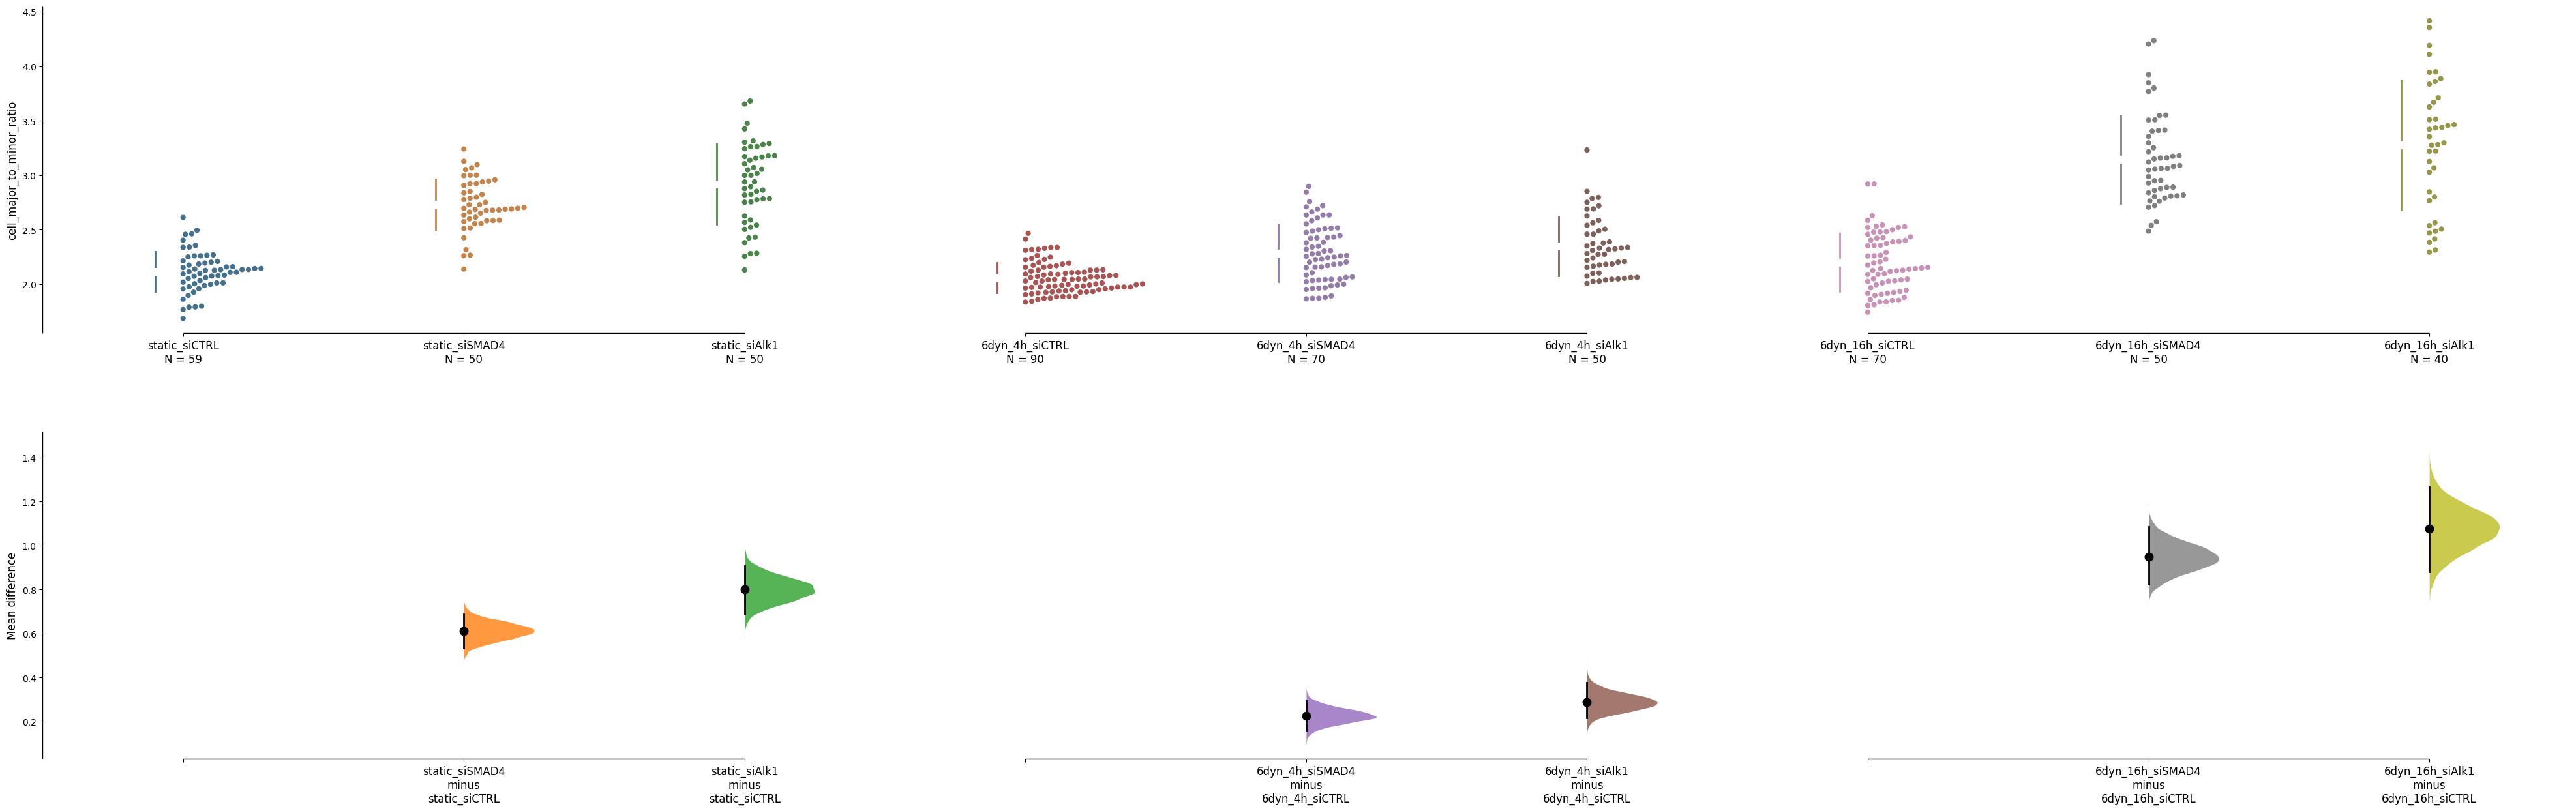

In [309]:
#DABEST plot for grouped analysis

f, axx = plt.subplots(nrows=1, ncols=1, figsize=(50,15), gridspec_kw={'wspace': 0.25}) 

properties_dabest = dabest.load(data = properties_mean_df, x="condition", y="cell_major_to_minor_ratio", 
                                idx=(('static_siCTRL','static_siSMAD4','static_siAlk1'), ('6dyn_4h_siCTRL', '6dyn_4h_siSMAD4', '6dyn_4h_siAlk1') , ('6dyn_16h_siCTRL', '6dyn_16h_siSMAD4', '6dyn_16h_siAlk1')))
                           #  idx=(('18dyn_4h_siCTRL','18dyn_4h_siSMAD4','18dyn_4h_siAlk1'), ('18dyn_16h_siCTRL','18dyn_16h_siSMAD4','18dyn_16h_siAlk1')))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax=axx);
test.savefig(output_folder + "dabest_stats_result_orientation_MV2.pdf")



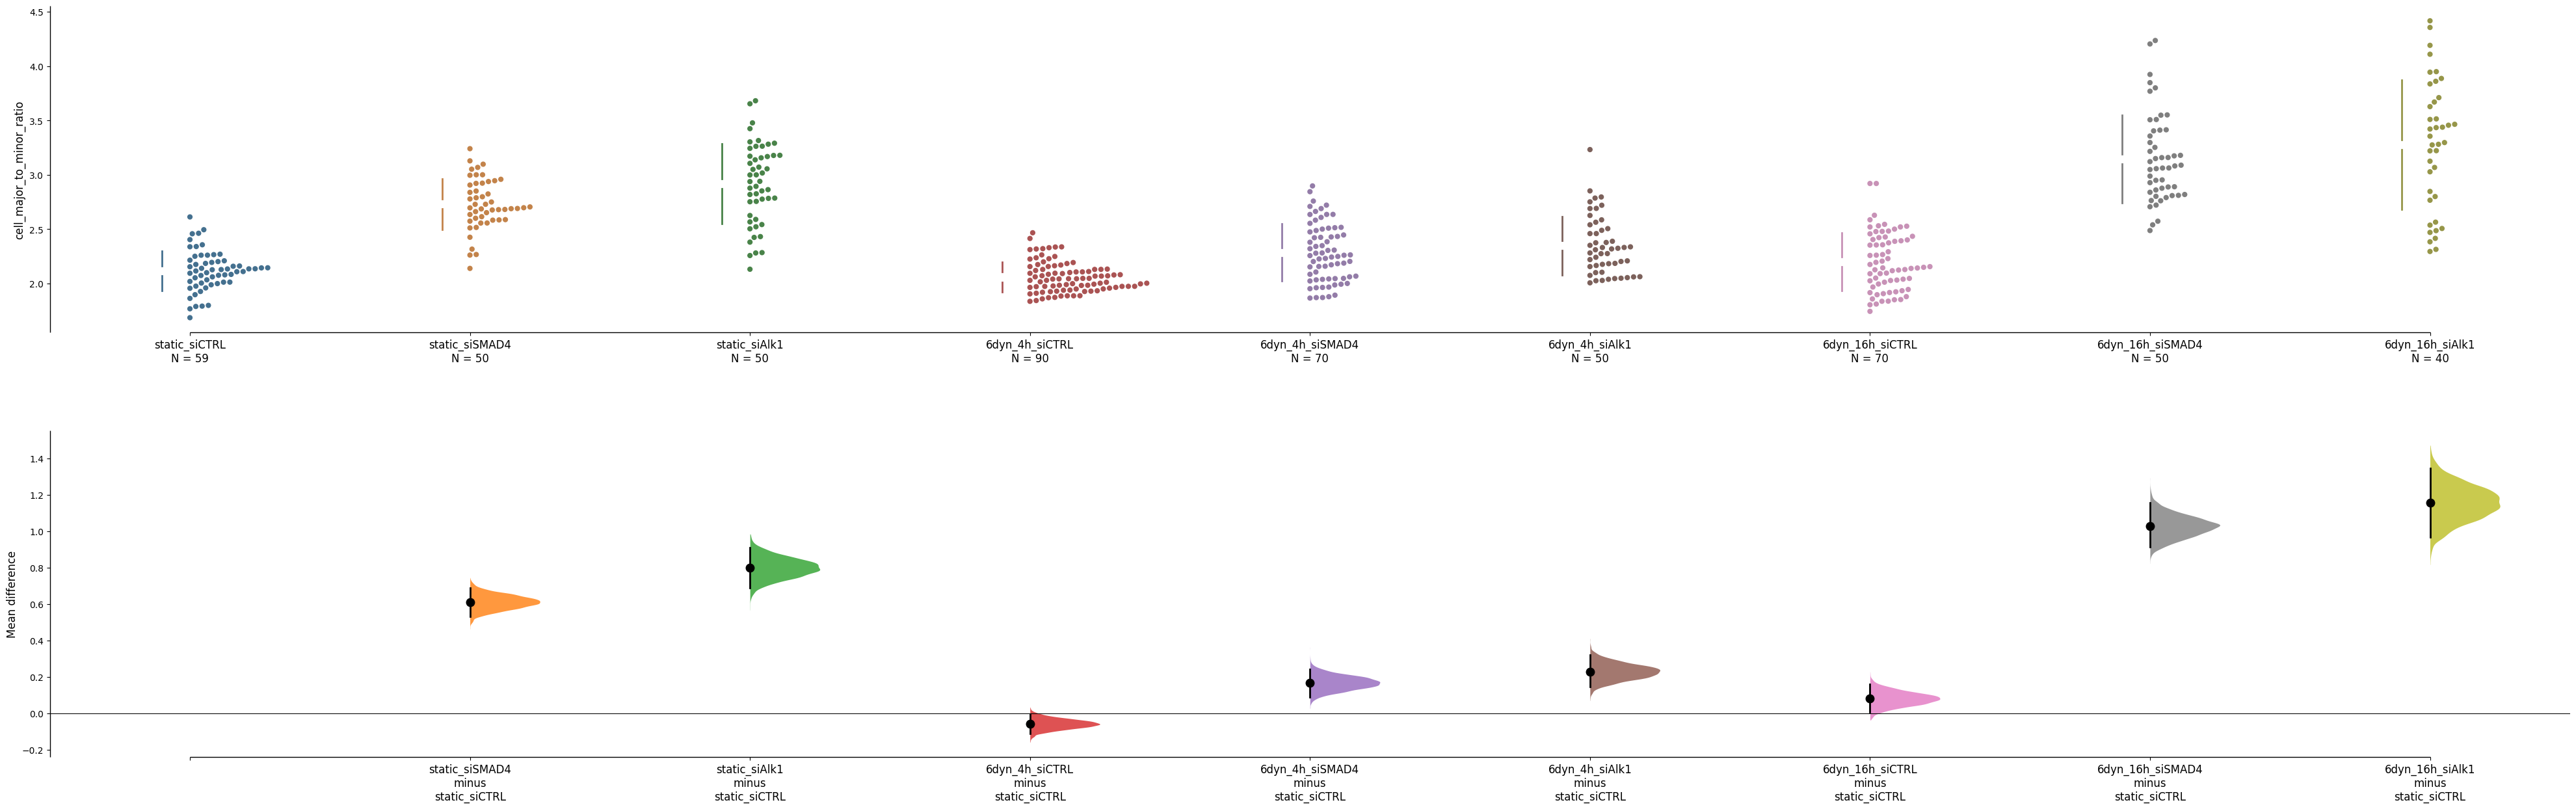

In [312]:
#DABEST plot for analysis relative to single control

f, axx = plt.subplots(nrows=1, ncols=1, figsize=(50,15))

properties_dabest = dabest.load(data=properties_mean_df, x="condition", y="cell_major_to_minor_ratio",
                          idx=('static_siCTRL','static_siSMAD4','static_siAlk1', '6dyn_4h_siCTRL', '6dyn_4h_siSMAD4', '6dyn_4h_siAlk1', '6dyn_16h_siCTRL', '6dyn_16h_siSMAD4', '6dyn_16h_siAlk1'))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax=axx);
test.savefig(output_folder + "dabest_stats_result_BPD_ratio.pdf")

<AxesSubplot: xlabel='condition', ylabel='cell_major_to_minor_ratio'>

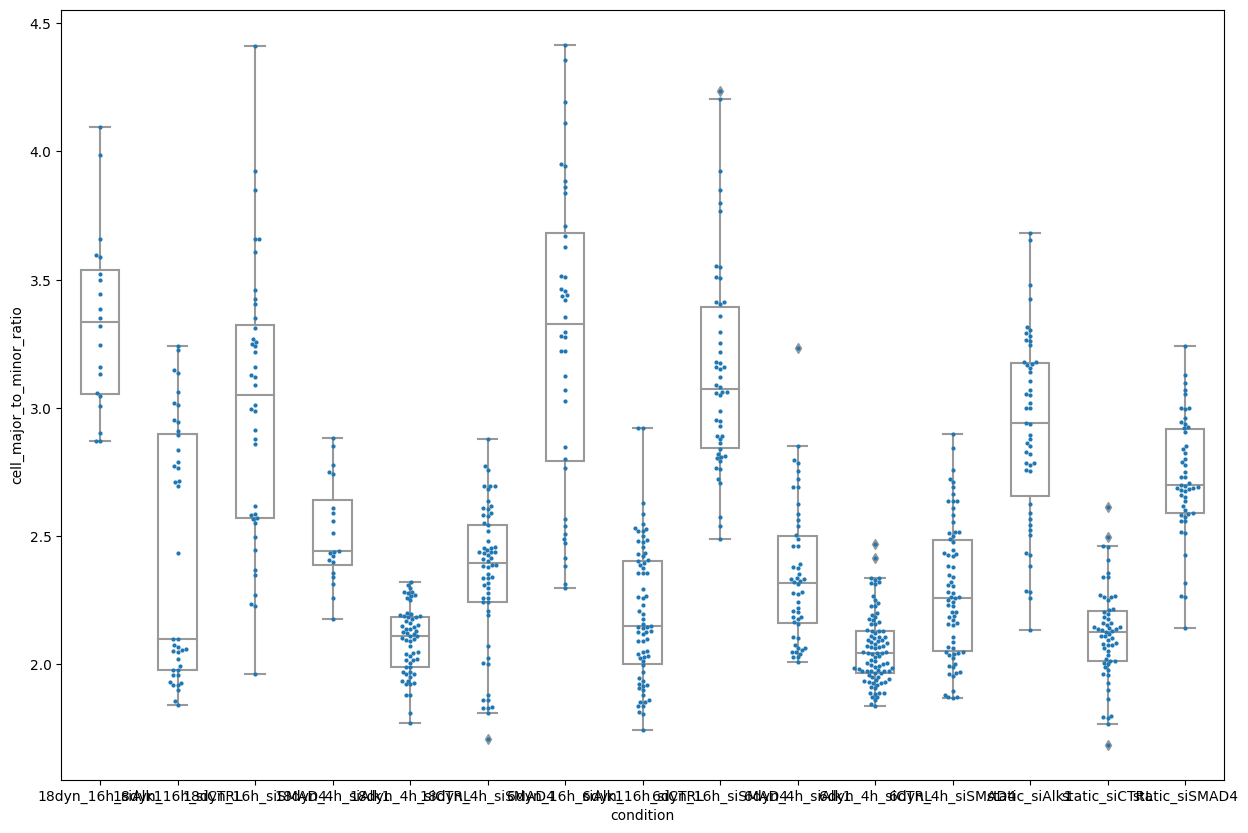

In [313]:
#box+swarm plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.boxplot(data = properties_mean_df, y ="cell_major_to_minor_ratio", x = "condition", width=0.5, color="white")#, showfliers=True)
sns.swarmplot(data = properties_mean_df, y ="cell_major_to_minor_ratio", x = "condition", size=3, dodge =True)
#sns.scatterplot(data = properties_mean_df, y ="cell_area_um^2", x = "condition") #, showfliers=False)


fig.savefig(output_folder + "Elongation_MV2_box_swarmplot.pdf")
#fig.savefig(output_folder + "pSMAD159_boxplot_18dyn_dodge.pdf")
#fig.savefig(output_folder + "stripplot.pdf")

In [ ]:
#generates csv file with statistical analysis data

properties_dabest = dabest.load(data=properties_mean_df, x="condition", y="cell_major_to_minor_ratio",
                            idx=(('static_siCTRL','static_siSMAD4','static_siAlk1'), ('6dyn_4h_siCTRL', '6dyn_4h_siSMAD4', '6dyn_4h_siAlk1') , ('6dyn_16h_siCTRL', '6dyn_16h_siSMAD4', '6dyn_16h_siAlk1')))
                         idx=(('siCTRL_static','siSMAD4_static','siAlk1_static'), ('siCTRL_6dyn_16h', 'siSMAD4_6dyn_16h', 'siAlk1_6dyn_16h')))  

mean_diff = properties_dabest.mean_diff.results
mean_diff.to_csv(output_folder + "Elongation_MV2_statistics_all.csv")
mean_diff